## imports 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn import metrics
from time import time

# pre-processing part

## Part 1

### import olivetti faces 

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


### what are our data set's keys

In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

### lets take a look at our dataset

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

In [ ]:
X,Y=faces.data, faces.target

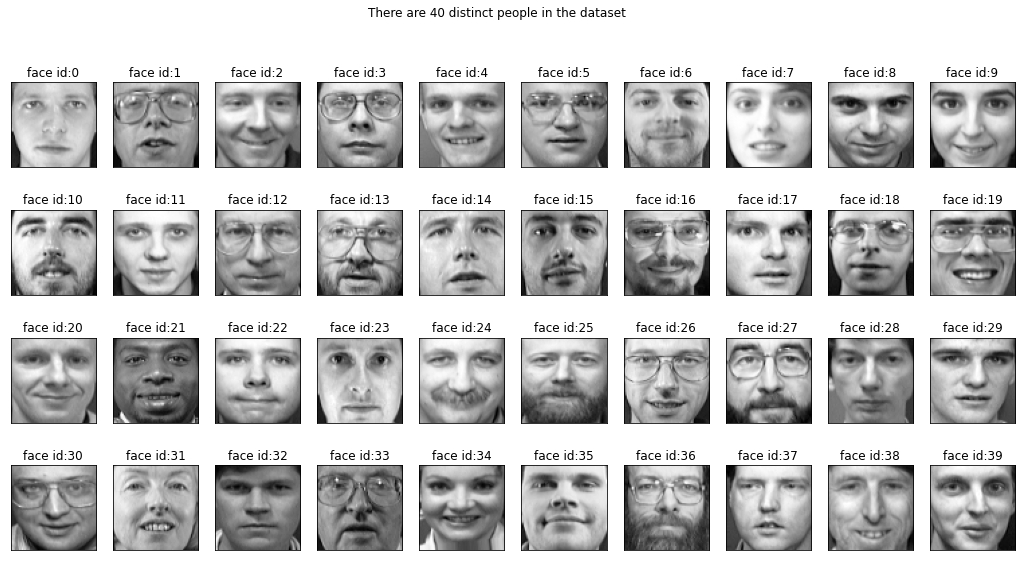

In [ ]:
show_40_distinct_people(faces.images, np.unique(Y))

### Now we find more about our data set

In [ ]:
print("the shape of our data is: {}".format(faces.data.shape))
print("the shape of our data is: {}".format(faces.images.shape))
print("There are {} images in our dataset".format(len(X)))
print("There are {} unique persons in the dataset".format(len(np.unique(Y))))
print("Size of each image is {}x{}".format(faces.images.shape[1],faces.images.shape[1]))

the shape of our data is: (400, 4096)
the shape of our data is: (400, 64, 64)
There are 400 images in our dataset
There are 40 unique persons in the dataset
Size of each image is 64x64


### we use StandardScaler to standard our data 

In [ ]:
faces.images.shape


(400, 64, 64)

In [ ]:
sc = StandardScaler()
X_s = sc.fit_transform(X)

end of part 1 

## Part 2

### calculating covariance matrix

In [ ]:
cov_mat = np.cov(X_s.T)
# Compute the eigenvalues and right eigenvectors of a square array.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 1.10361837e+03+0.00000000e+00j  5.06810767e+02+0.00000000e+00j
  3.21988948e+02+0.00000000e+00j ... -5.78626026e-16+8.27137745e-17j
 -5.78626026e-16-8.27137745e-17j -4.85663955e-16+0.00000000e+00j]


### calculating eigenvalue, eigenvector

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
for k in range(4095):
    eigen_vals[k]=eigen_pairs[k][0]
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 1.10361837e+03+0.j  5.06810767e+02+0.j  3.21988948e+02+0.j ...
  1.21297803e-16+0.j  1.02462849e-16+0.j -4.85663955e-16+0.j]


In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.00332091+0.j  0.02209019+0.j]
 [ 0.0051638 +0.j  0.02419231+0.j]
 [ 0.00662312+0.j  0.02679893+0.j]
 ...
 [-0.00136457+0.j -0.02241647+0.j]
 [-0.00355313+0.j -0.02091237+0.j]
 [-0.00343196+0.j -0.01938374+0.j]]


### showing dataset using pca1 & pca2 based on calculated egvec and egval

original data

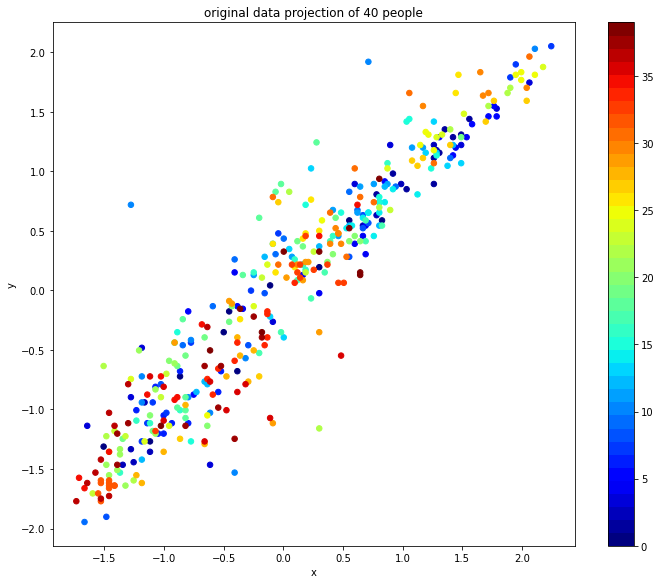

In [ ]:
number_of_people=40
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_s[:index_range,0],
            X_s[:index_range,1], 
            c=faces.target[:index_range],
            s=30,
           cmap=plt.get_cmap('jet', number_of_people)
          )

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
ax.set_title("original data projection of {} people".format(number_of_people))

fig.colorbar(scatter)

pca plot


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


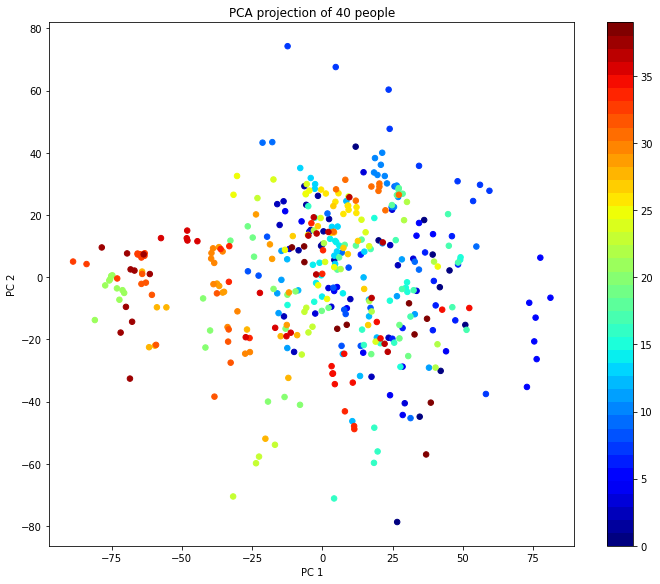

In [ ]:
X_s_pca = X_s.dot(w)
number_of_people=40
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_s_pca[:index_range,0],
            X_s_pca[:index_range,1], 
            c=faces.target[:index_range],
            s=30,
           cmap=plt.get_cmap('jet', number_of_people)
          )

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

## part 3

### calculating explained variance ratio 

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

<ipython-input-19-68952dcf8cd0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211).set_ylim([0, 0.1])
/usr/local/lib/python3.8/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


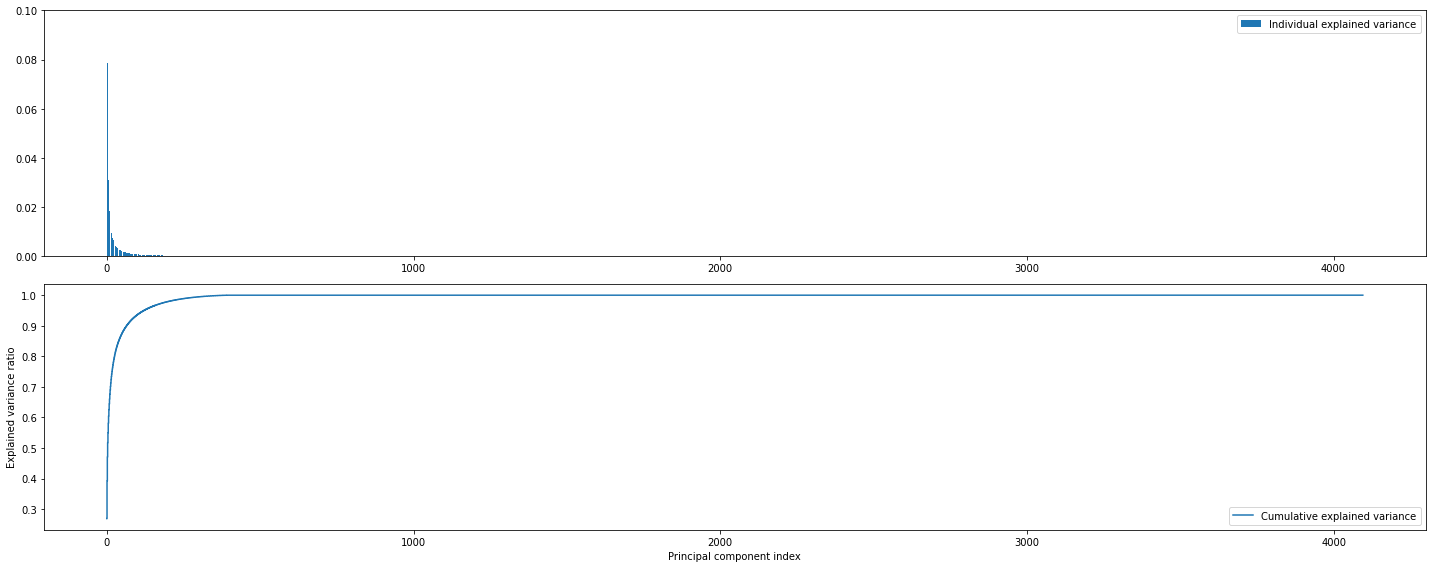

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(211)
plt.subplot(211).set_ylim([0, 0.1])
plt.bar(range(0, 4096), var_exp, alpha=1, align='center', 
        label='Individual explained variance')
plt.legend(loc='best')
plt.subplot(212)
plt.step(range(0, 4096), cum_var_exp, where='mid',
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Processing 

## part 4 

### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, faces.target, test_size=0.25, stratify=faces.target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

In [ ]:
n_components=80
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=80, whiten=True)

In [ ]:
faces.data.shape[1]

4096

Text(0.5, 0.98, 'All Eigen Faces')

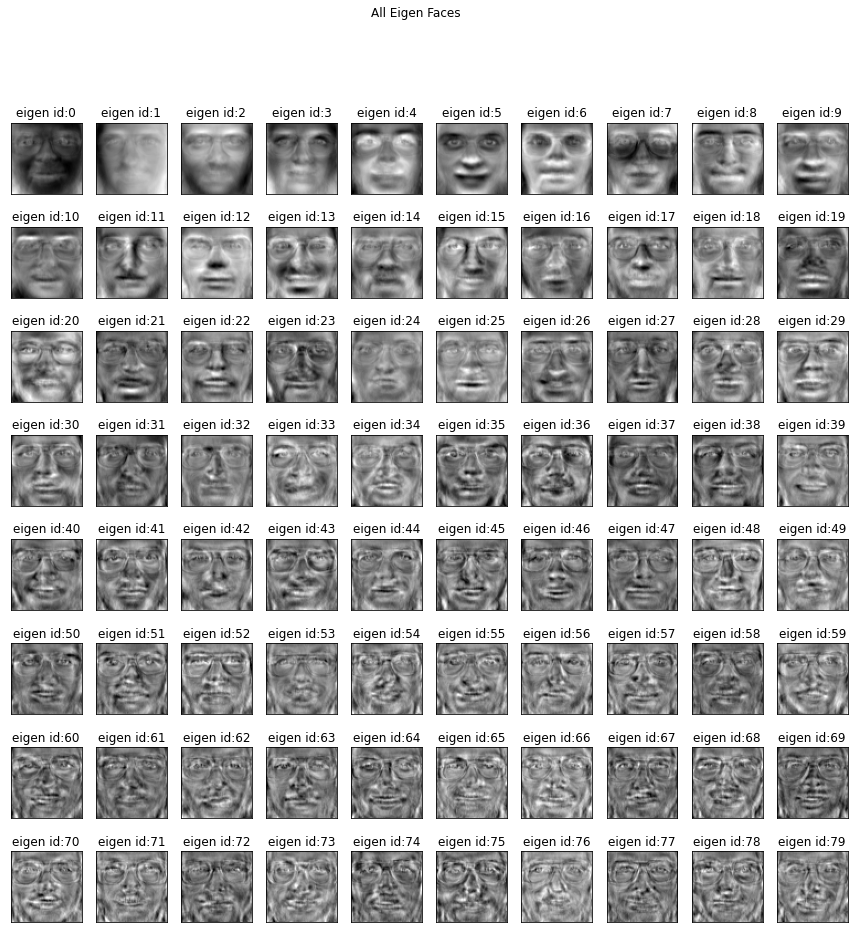

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, faces.images.shape[1], faces.images.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

training with pca 

In [ ]:
import sklearn.linear_model as sk

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
clf = sk.LogisticRegressionCV()
%timeit clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

The slowest run took 5.03 times longer than the fastest. This could mean that an intermediate result is being cached.
3.73 s ± 2.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.94


no pca 
we know that this is gonna take much more time

In [ ]:
clf = sk.LogisticRegressionCV()
%timeit clf.fit(X_train, y_train)
y_pred_org = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

2min 50s ± 3.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_org)))

accuracy score:0.96


## part 5

LDA dimensionality reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
clf = LinearDiscriminantAnalysis()
%timeit clf.fit(X_train_pca, y_train)
y_pred_lda = clf.predict(X_test_pca)

17 ms ± 6.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_lda)))

accuracy score:0.96
